In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
df.isna().sum()['age']/df.shape[0]

0.19865319865319866

In [8]:
df.isna().sum()['deck']/df.shape[0]

0.7721661054994389

<Axes: >

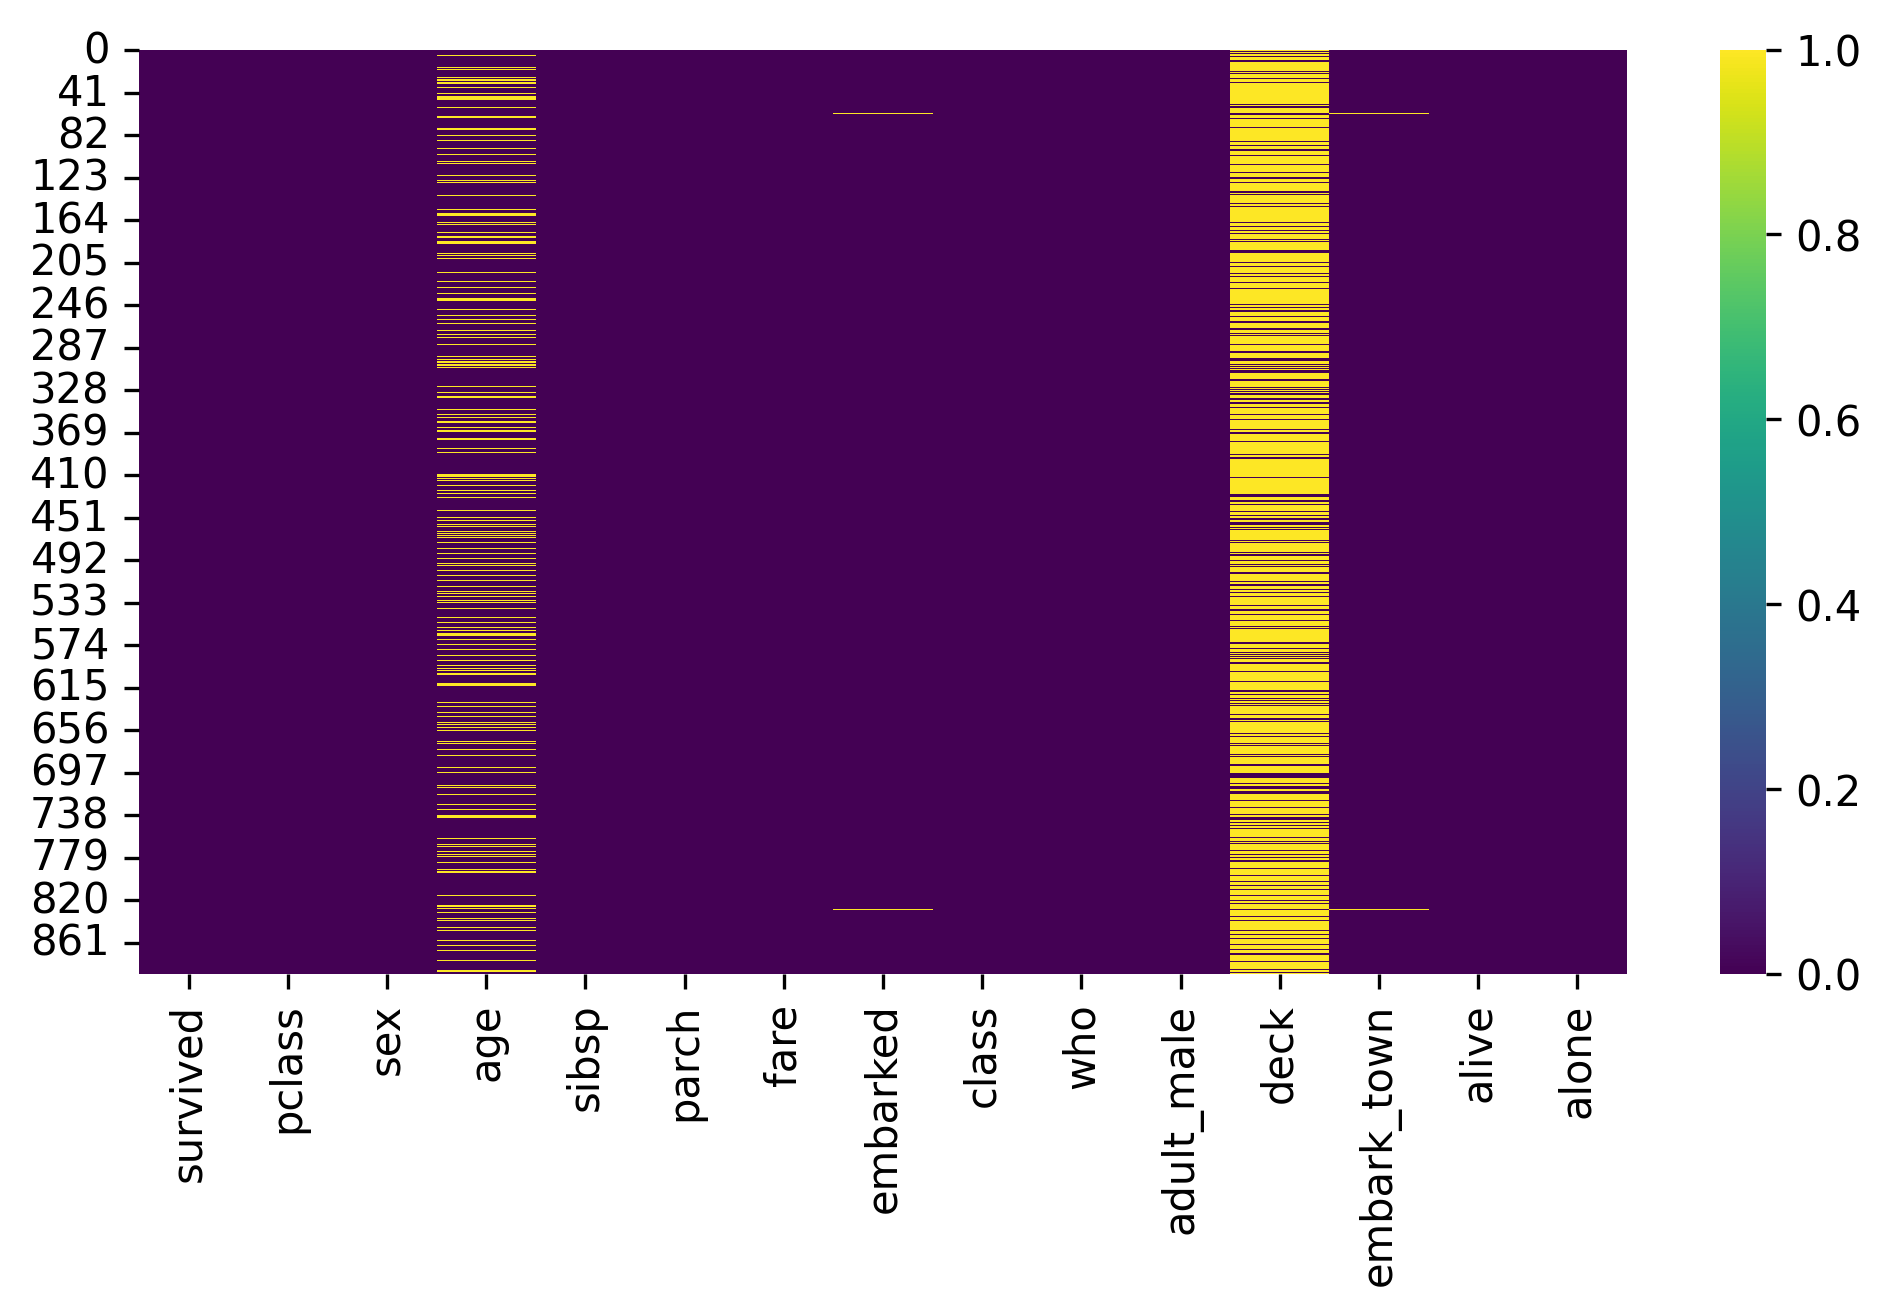

In [9]:
plt.rcParams['figure.figsize']=[8,4]
plt.rcParams['figure.dpi']=300

sns.heatmap(df.isna(),cmap='viridis')

Text(0.5, 0, 'age')

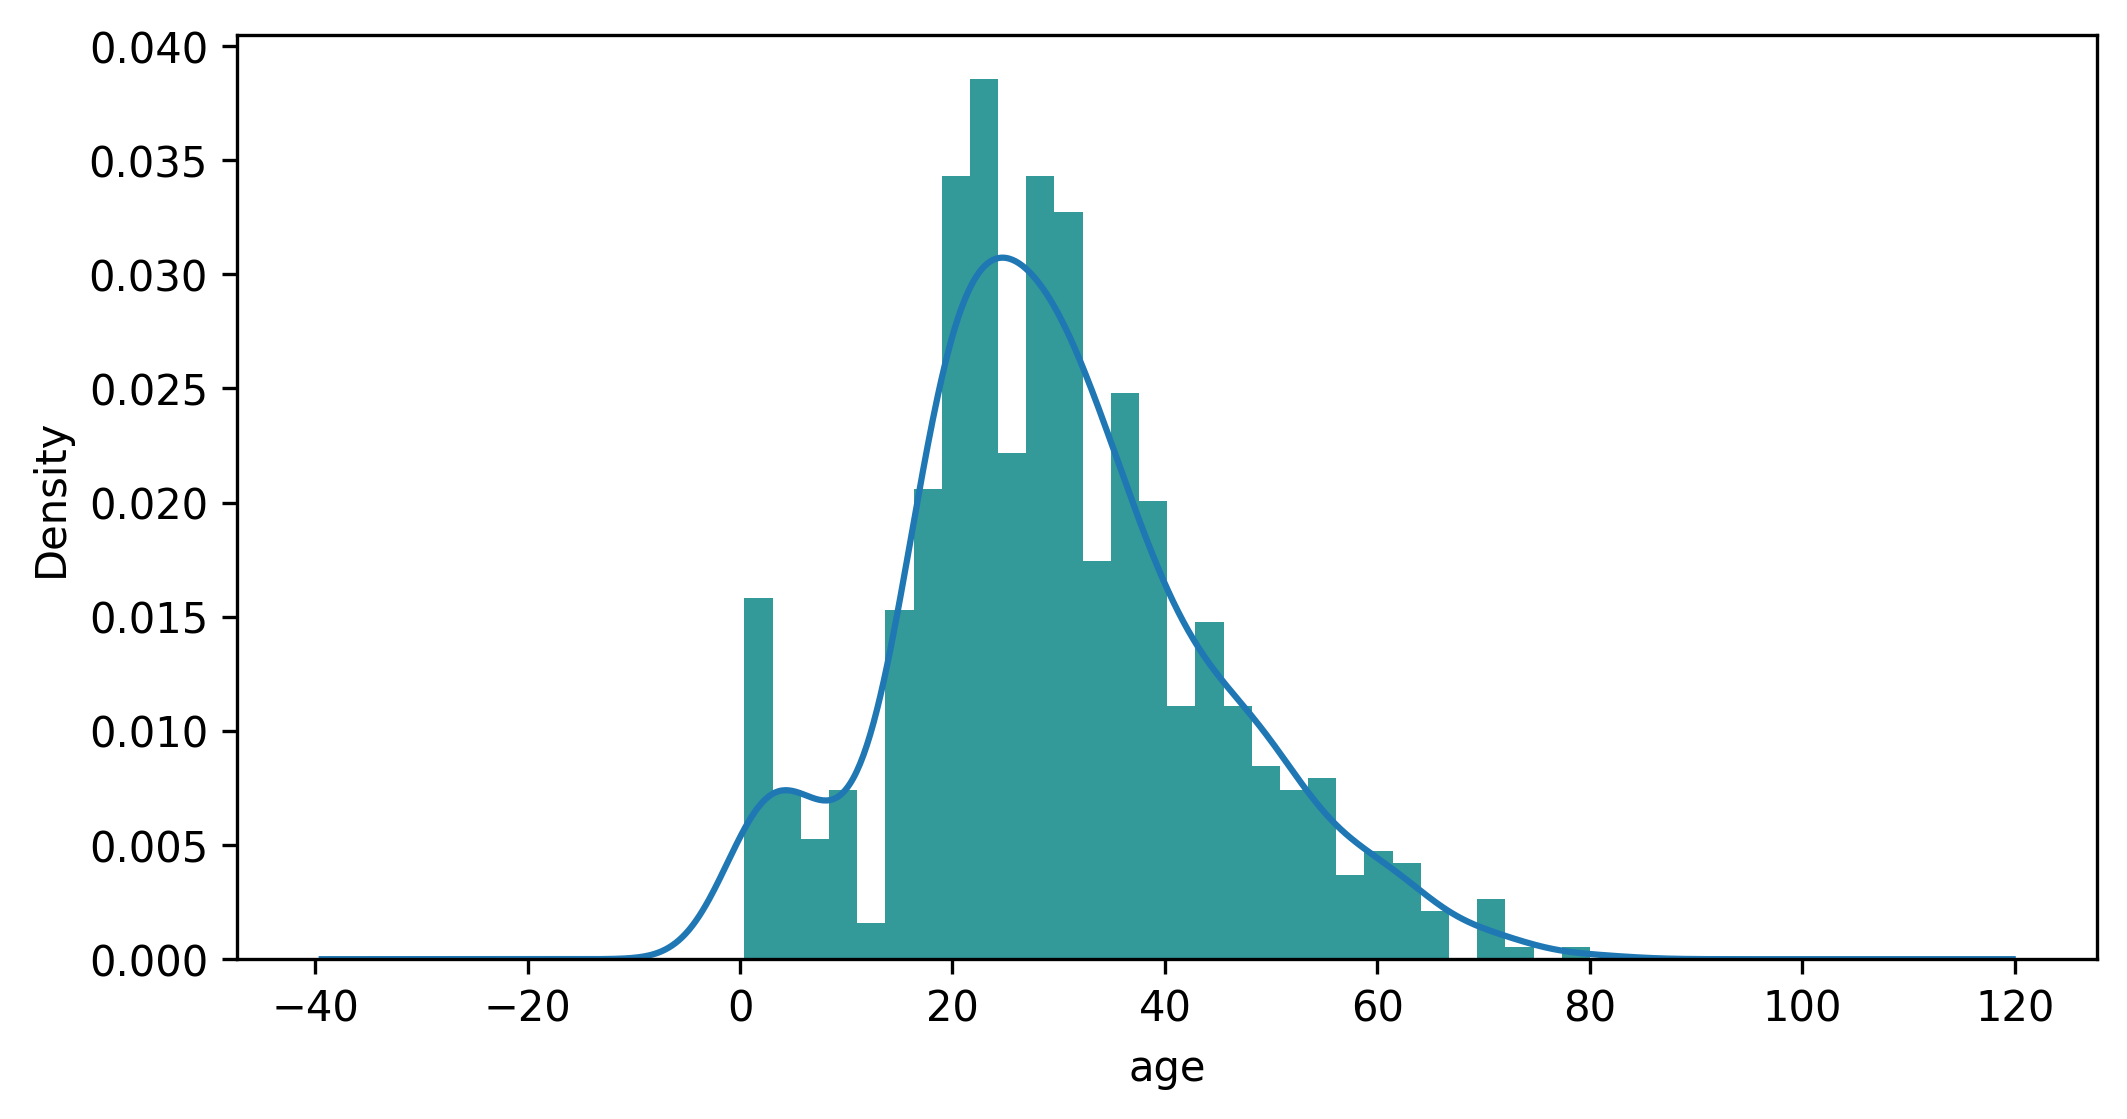

In [10]:
ax=df['age'].hist(bins=30,color='teal',grid=False,alpha=0.8,density=True)
df['age'].plot(kind='density',ax=ax)
ax.set_xlabel('age')

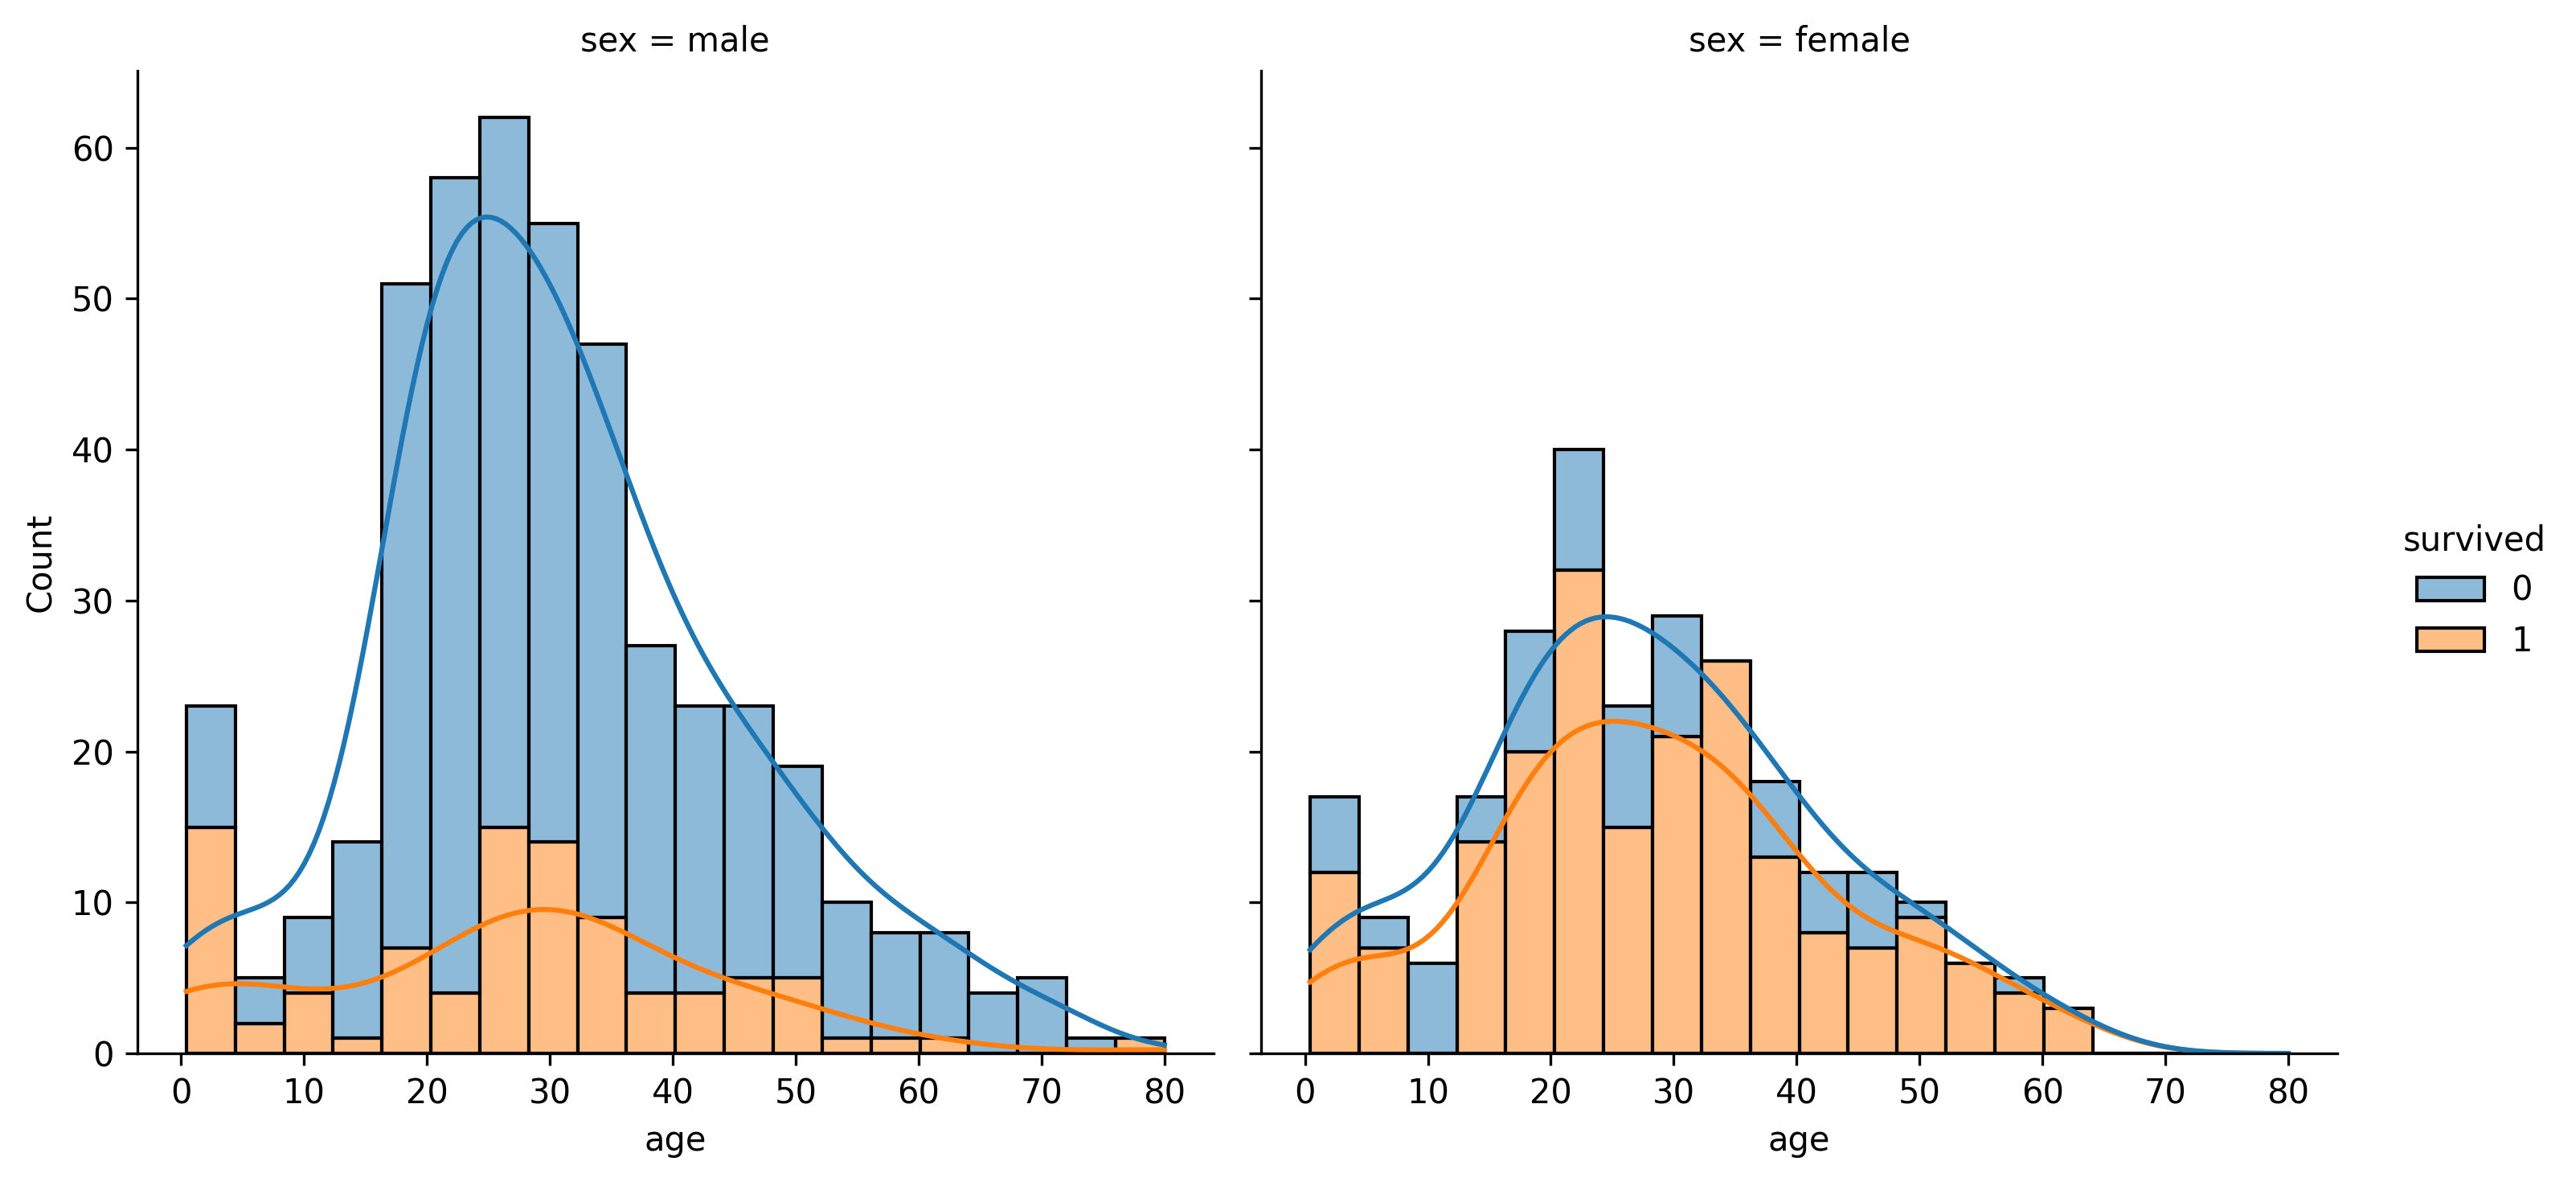

In [11]:
sns.displot(data=df,x='age',kde=True,bins=20,hue='survived',multiple='stack',col='sex')

In [12]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [13]:
df[df['survived']==1]['sex'].value_counts()

sex
female    233
male      109
Name: count, dtype: int64

In [14]:
df['age'].mean()

29.69911764705882

In [15]:
df[df['sex']=='male']['age'].mean()

30.72664459161148

In [16]:
df[df['sex']=='female']['age'].mean()

27.915708812260537

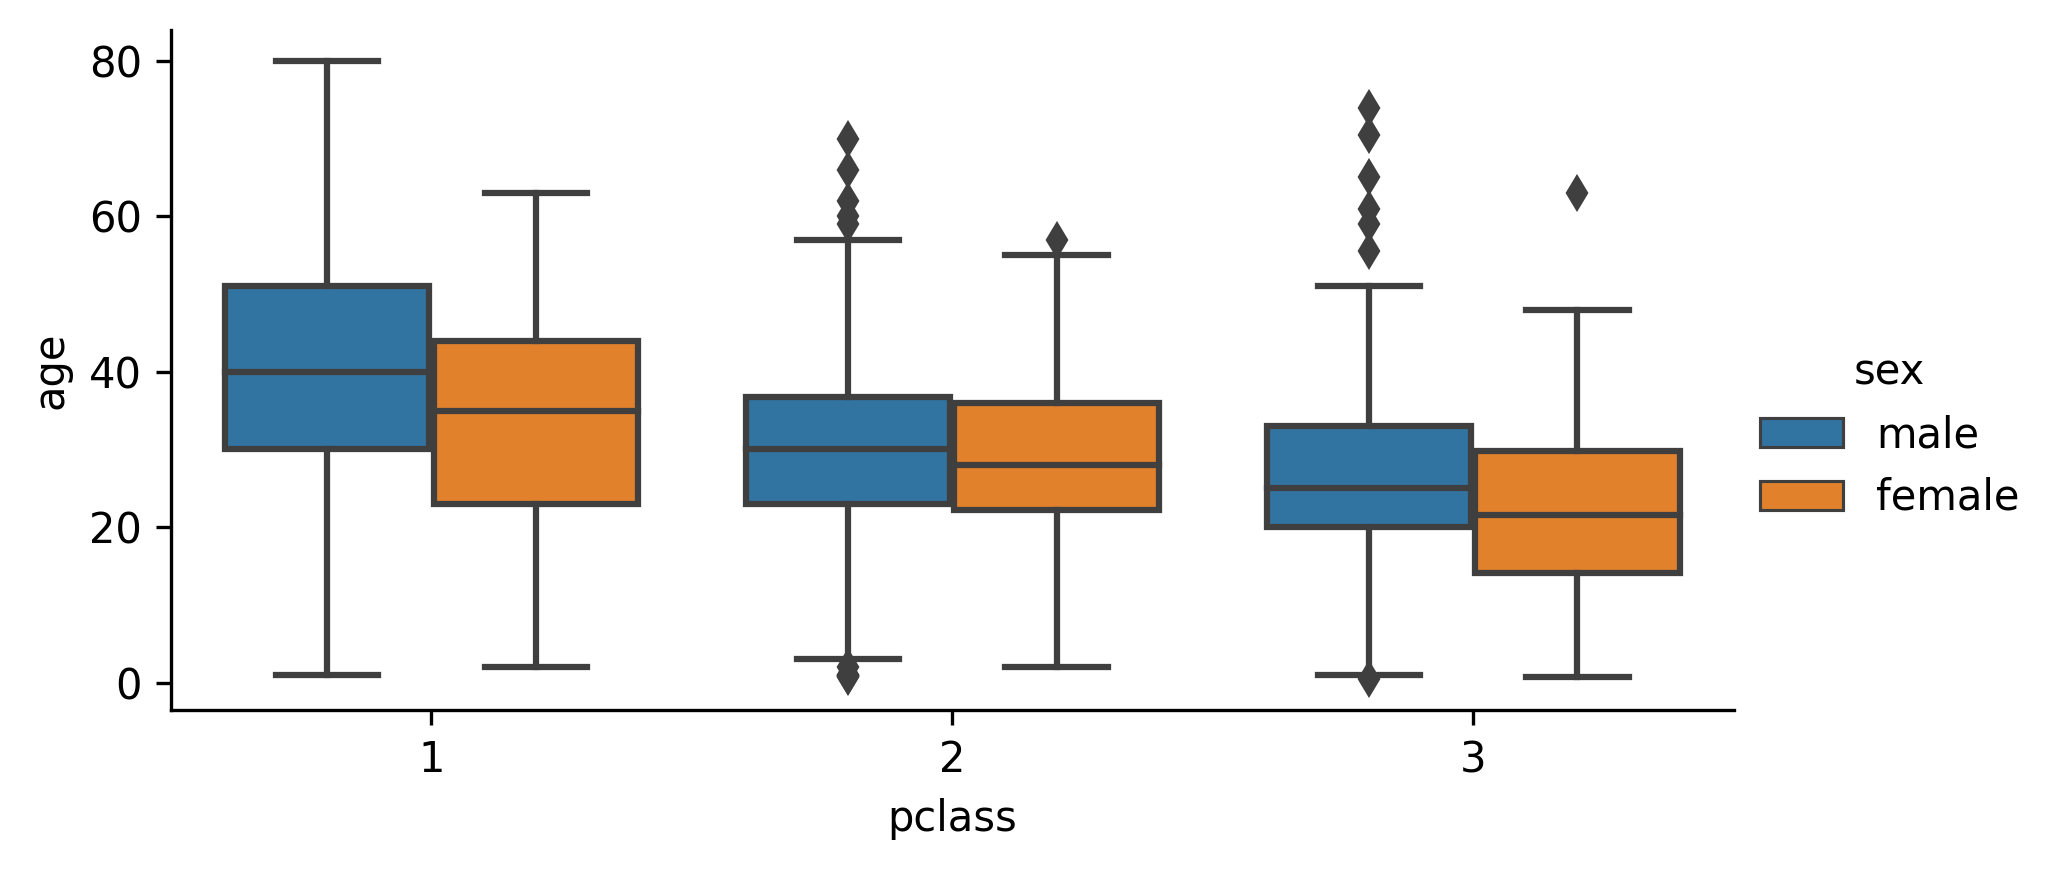

In [17]:
sns.catplot(x='pclass',y='age',data=df,kind='box',
           height=3,aspect=2,hue='sex')

In [18]:
def impute_age(pclass, sex):
    if sex=='male':
        if pclass == 1:
            return df[(df['pclass'] == 1) & (df['sex'] == 'male')]['age'].mean()
        elif pclass == 2:
            return df[(df['pclass'] == 2) & (df['sex'] == 'male')]['age'].mean()
        elif pclass == 3:
            return df[(df['pclass'] == 3) & (df['sex'] == 'male')]['age'].mean()
    else:
        if pclass == 1:
            return df[(df['pclass'] == 1) & (df['sex'] == 'female')]['age'].mean()
        elif pclass == 2:
            return df[(df['pclass'] == 2) & (df['sex'] == 'female')]['age'].mean()
        elif pclass == 3:
            return df[(df['pclass'] == 3) & (df['sex'] == 'female')]['age'].mean()


In [19]:
df['age'] = df.apply(lambda x: impute_age(x['pclass'], x['sex']) if np.isnan(x['age']) else x['age'], axis=1)
df['age']

0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    21.75
889    26.00
890    32.00
Name: age, Length: 891, dtype: float64

In [20]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

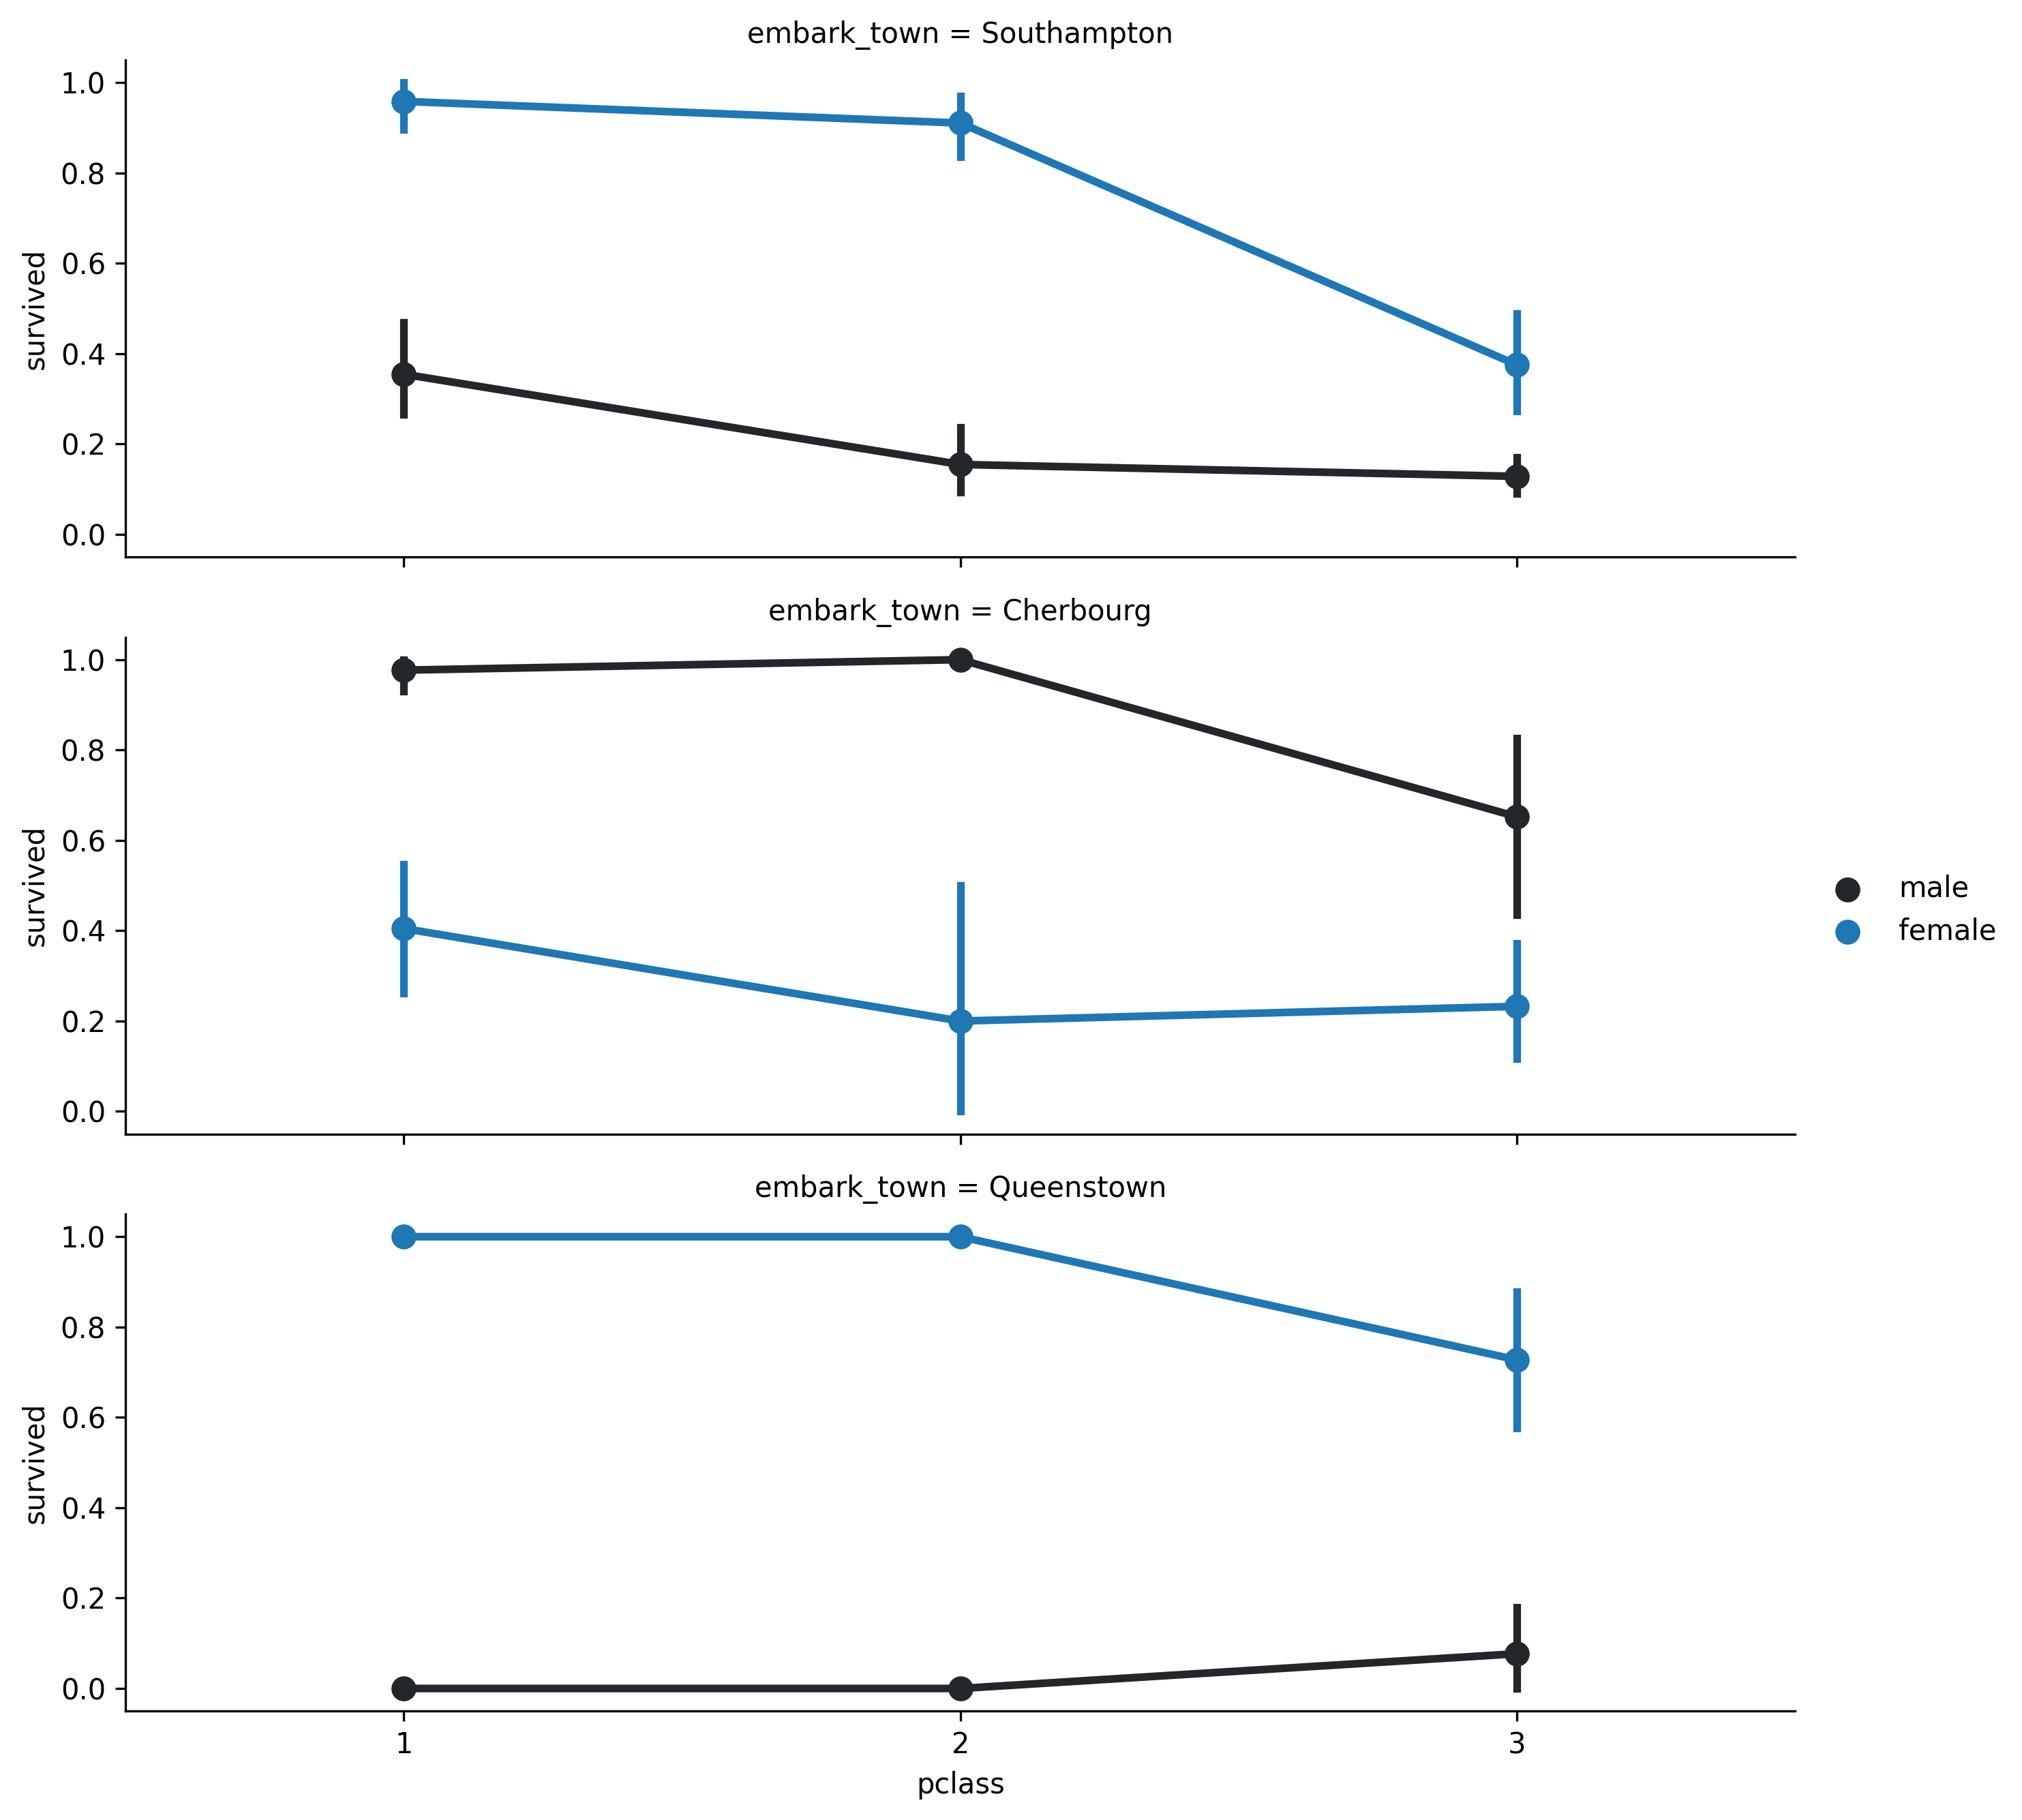

In [21]:
f=sns.FacetGrid(df,row='embark_town',height=3,aspect=3)
f.map(sns.pointplot,'pclass','survived','sex',order=None,hue_order=None)
f.add_legend()

In [22]:
df['embark_town'].isna().sum()

2

In [23]:
df['embark_town'].value_counts()    

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [24]:
df['embark_town'].fillna('Southampton',inplace=True)

In [25]:
df['embarked'].fillna('S',inplace=True)

In [26]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [27]:
df.drop(['deck','alive','embark_town'],inplace=True,axis=1)

In [28]:
df.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 71.5+ KB


In [30]:
df['age']=df['age'].astype('int')
df['pclass']=df['pclass'].astype('int')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int32  
 2   sex         891 non-null    object 
 3   age         891 non-null    int32  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(1), int32(2), int64(3), object(4)
memory usage: 64.5+ KB


In [32]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
gender={'male':0,'female':1}
df['sex']=df['sex'].map(gender)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int32  
 2   sex         891 non-null    int64  
 3   age         891 non-null    int32  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    object 
 8   class       891 non-null    object 
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(1), int32(2), int64(4), object(3)
memory usage: 64.5+ KB


In [35]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [36]:
who={'man':0,'woman':1,'child':2}

In [37]:
# df['who']=df['who'].map(who)   ## fix this with one hot encoding

In [38]:
# df['who'].unique()

In [39]:
df['adult_male'].value_counts()

adult_male
True     537
False    354
Name: count, dtype: int64

In [40]:
df['adult_male']=df['adult_male'].map({True:1,False:0})

In [41]:
df['adult_male'].unique()

array([1, 0], dtype=int64)

In [42]:
df['alone']=df['alone'].map({True:1,False:0})

In [43]:
df['adult_male'].unique()

array([1, 0], dtype=int64)

        If there more then two values in an object then we use one hot encoding instead od mapping 

In [44]:
df=pd.get_dummies(df,columns=['embarked','who'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int32  
 2   sex         891 non-null    int64  
 3   age         891 non-null    int32  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   class       891 non-null    object 
 8   adult_male  891 non-null    int64  
 9   alone       891 non-null    int64  
 10  embarked_C  891 non-null    bool   
 11  embarked_Q  891 non-null    bool   
 12  embarked_S  891 non-null    bool   
 13  who_child   891 non-null    bool   
 14  who_man     891 non-null    bool   
 15  who_woman   891 non-null    bool   
dtypes: bool(6), float64(1), int32(2), int64(6), object(1)
memory usage: 68.0+ KB


In [46]:
df.drop(['embarked_S','who_woman'],axis=1,inplace=True)

In [47]:
df

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alone,embarked_C,embarked_Q,who_child,who_man
0,0,3,0,22,1,0,7.2500,Third,1,0,False,False,False,True
1,1,1,1,38,1,0,71.2833,First,0,0,True,False,False,False
2,1,3,1,26,0,0,7.9250,Third,0,1,False,False,False,False
3,1,1,1,35,1,0,53.1000,First,0,0,False,False,False,False
4,0,3,0,35,0,0,8.0500,Third,1,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,Second,1,1,False,False,False,True
887,1,1,1,19,0,0,30.0000,First,0,1,False,False,False,False
888,0,3,1,21,1,2,23.4500,Third,0,0,False,False,False,False
889,1,1,0,26,0,0,30.0000,First,1,1,True,False,False,True


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int32  
 2   sex         891 non-null    int64  
 3   age         891 non-null    int32  
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   class       891 non-null    object 
 8   adult_male  891 non-null    int64  
 9   alone       891 non-null    int64  
 10  embarked_C  891 non-null    bool   
 11  embarked_Q  891 non-null    bool   
 12  who_child   891 non-null    bool   
 13  who_man     891 non-null    bool   
dtypes: bool(4), float64(1), int32(2), int64(6), object(1)
memory usage: 66.3+ KB


In [49]:
df=pd.get_dummies(df,columns=['pclass'])

In [50]:
df.head(1)

,survived,sex,age,sibsp,parch,fare,class,adult_male,alone,embarked_C,embarked_Q,who_child,who_man,pclass_1,pclass_2,pclass_3
0,0,0,22,1,0,7.25,Third,1,0,False,False,False,True,False,False,True


In [51]:
df.drop(['pclass_3'],axis=1,inplace=True)

In [52]:
df.drop(['class'],axis=1,inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    int32  
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    int64  
 7   alone       891 non-null    int64  
 8   embarked_C  891 non-null    bool   
 9   embarked_Q  891 non-null    bool   
 10  who_child   891 non-null    bool   
 11  who_man     891 non-null    bool   
 12  pclass_1    891 non-null    bool   
 13  pclass_2    891 non-null    bool   
dtypes: bool(6), float64(1), int32(1), int64(6)
memory usage: 57.6 KB


In [54]:
df['embarked_C']=df['embarked_C'].map({True:1,False:0})
df['embarked_Q']=df['embarked_Q'].map({True:1,False:0})
df['pclass_1']=df['pclass_1'].map({True:1,False:0})
df['who_child']=df['who_child'].map({True:1,False:0})
df['who_man']=df['who_man'].map({True:1,False:0})
df['pclass_2']=df['pclass_2'].map({True:1,False:0})

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    int32  
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    int64  
 7   alone       891 non-null    int64  
 8   embarked_C  891 non-null    int64  
 9   embarked_Q  891 non-null    int64  
 10  who_child   891 non-null    int64  
 11  who_man     891 non-null    int64  
 12  pclass_1    891 non-null    int64  
 13  pclass_2    891 non-null    int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 94.1 KB


In [56]:
# df['embarked_C']=df['embarked_C'].astype('uint8')
# df['embarked_Q']=df['embarked_Q'].astype('uint8')
# df['pclass_1']=df['pclass_1'].astype('uint8')
# df['who_child']=df['who_child'].astype('uint8')
# df['who_man']=df['who_man'].astype('uint8')
# df['pclass_2']=df['pclass_2'].astype('uint8')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    int32  
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    int64  
 7   alone       891 non-null    int64  
 8   embarked_C  891 non-null    int64  
 9   embarked_Q  891 non-null    int64  
 10  who_child   891 non-null    int64  
 11  who_man     891 non-null    int64  
 12  pclass_1    891 non-null    int64  
 13  pclass_2    891 non-null    int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 94.1 KB


In [58]:
df.astype('int')
# not needed

,survived,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,who_child,who_man,pclass_1,pclass_2
0,0,0,22,1,0,7,1,0,0,0,0,1,0,0
1,1,1,38,1,0,71,0,0,1,0,0,0,1,0
2,1,1,26,0,0,7,0,1,0,0,0,0,0,0
3,1,1,35,1,0,53,0,0,0,0,0,0,1,0
4,0,0,35,0,0,8,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,0,0,13,1,1,0,0,0,1,0,1
887,1,1,19,0,0,30,0,1,0,0,0,0,1,0
888,0,1,21,1,2,23,0,0,0,0,0,0,0,0
889,1,0,26,0,0,30,1,1,1,0,0,1,1,0


### Model

In [59]:
input_col=list[df.columns[1:]]
target_col='survived'

In [60]:
df[input_col]

,survived,sex,age,sibsp,parch,fare,adult_male,alone,embarked_C,embarked_Q,who_child,who_man,pclass_1,pclass_2
0,0,0,22,1,0,7.2500,1,0,0,0,0,1,0,0
1,1,1,38,1,0,71.2833,0,0,1,0,0,0,1,0
2,1,1,26,0,0,7.9250,0,1,0,0,0,0,0,0
3,1,1,35,1,0,53.1000,0,0,0,0,0,0,1,0
4,0,0,35,0,0,8.0500,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27,0,0,13.0000,1,1,0,0,0,1,0,1
887,1,1,19,0,0,30.0000,0,1,0,0,0,0,1,0
888,0,1,21,1,2,23.4500,0,0,0,0,0,0,0,0
889,1,0,26,0,0,30.0000,1,1,1,0,0,1,1,0


In [61]:
x=df[input_col]
y=df[target_col]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.linear_model import LogisticRegression

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [75]:
x.shape,x_train.shape,x_test.shape

((891, 14), (623, 14), (268, 14))

In [76]:
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [77]:
y_predict=model.predict(x_test)

In [80]:
model.score(x_test,y_test)

1.0

In [84]:
 y_predict[:10]

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [85]:
y_test.head(10)

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: survived, dtype: int64